In [1]:
import numpy as np
import matplotlib.pyplot as plt

from opticalpy import op3d

%matplotlib ipympl

c:\Users\aurel\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
sc = op3d.Scene(lifetime=20, step=1e-3, plot_res=10)

### Define beam

In [3]:
# Beam

white = op3d.elems.WhiteRay(wavelengths=np.linspace(400,620,10), 
                                origin=np.array([0,-1,0]), direction=np.array([0,1,0]), 
                                scene=sc, plot_alpha=0.5, order=1)

### Define optical surface geometry

In [4]:
# opt = op3d.elems.FlatMirror(diameter=10, scene=sc)
# opt = op3d.elems.ParabolicMirror(focal=10, diameter=10, scene=sc, origin=[0,2,0], direction=[0,-1,0])
# opt = op3d.elems.SphericalMirror(radius=10, diameter=10, scene=sc)
# opt = op3d.elems.ParabolicMirrorHole(focal=10, diameter=10, hole_diameter=5, scene=sc)
# opt = op3d.elems.Slit(width=7, height=6, slit_width=0.3, slit_height=4, scene=sc)
# opt = op3d.elems.EllipticalFlatMirror(a=10, b=5, scene=sc)
opt = op3d.elems.Grating(width=10, height=5, period=200, scene=sc)

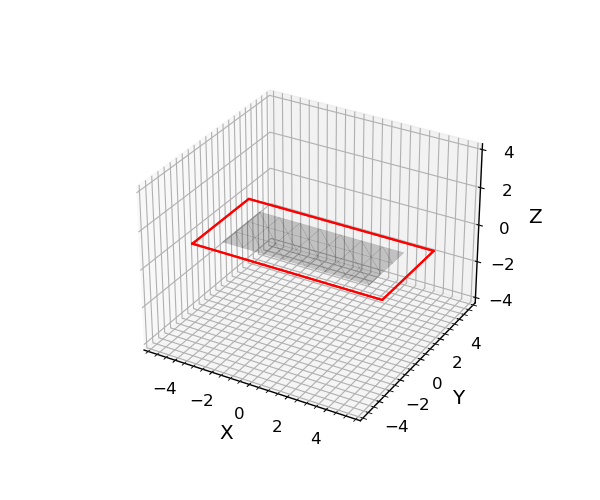

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
opt.__plot__(ax, show_hitbox=True)
ax.set_aspect('equal', 'datalim')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Rotate and translate optical surface

In [6]:
opt.set_origin([0,10,0])
opt.set_direction([0,-1,-0])
opt.rotate(np.deg2rad(10), [0,0,1], absolute=True)
opt.rotate(np.deg2rad(10), [1,0,0], absolute=True)
opt.rotate(np.deg2rad(90))

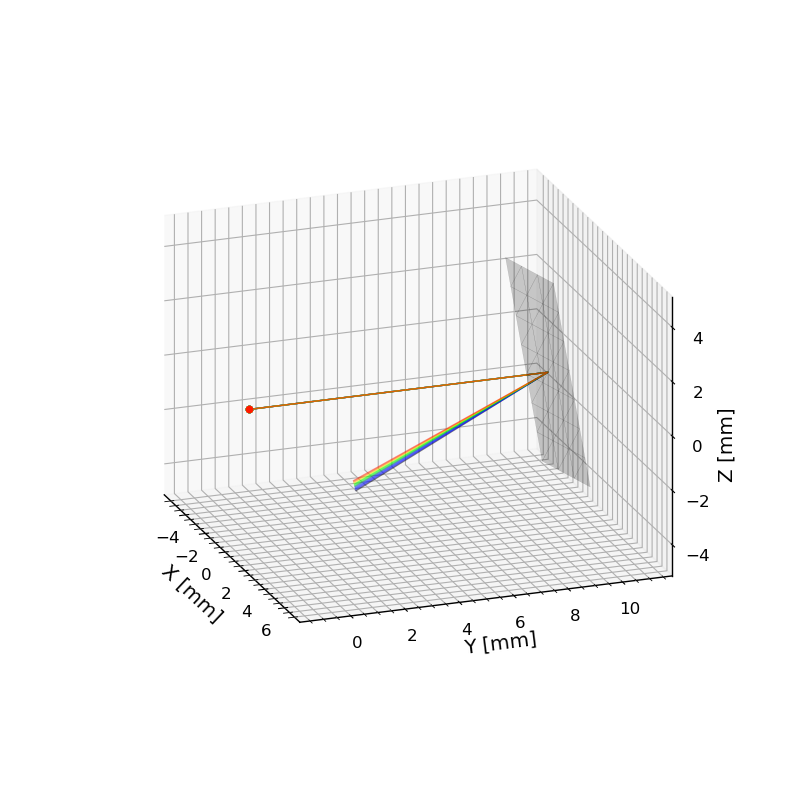

In [7]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'3d'})

sc.plot(ax=ax, show=False)

ax.set_proj_type('ortho')
ax.view_init(elev=20, azim=-20)
plt.show()

## Czerny-Turner Spectrograph

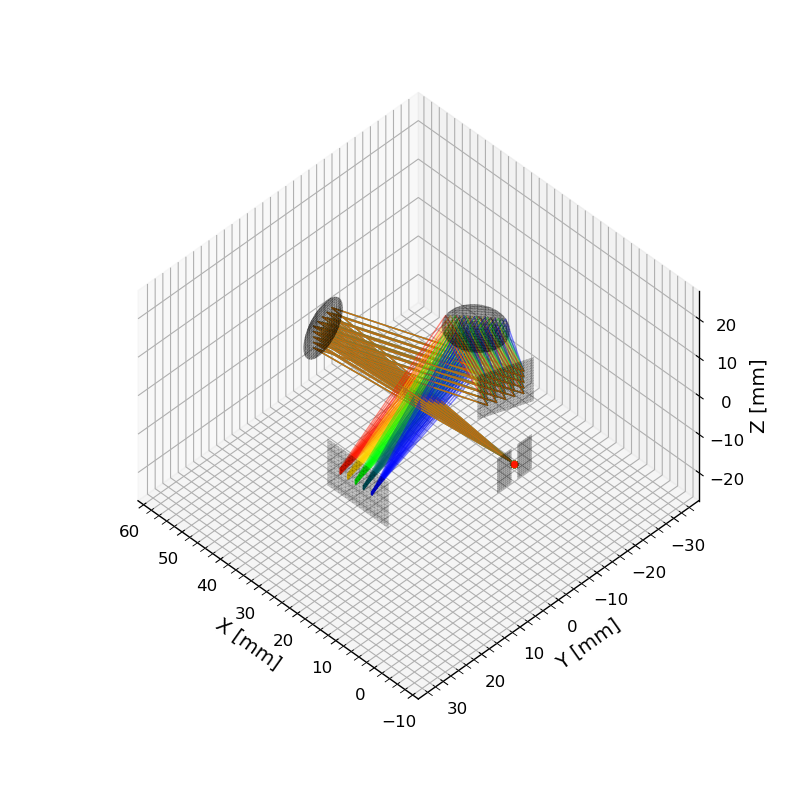

In [14]:
sc = op3d.Scene(lifetime=200, step=1e-2, plot_res=20, 
                 xlim=(-10,60), ylim=(-30, 30), zlim=(-10,10))

slit_width = 1
slit_size = 10
primary_f    = 50
primary_aper = 12.7
second_f     = primary_f
second_aper  = primary_aper

slit = op3d.elems.Slit(width=slit_size, height=slit_size, slit_width=slit_width, 
                       scene=sc, origin=[0,0,0], direction=[1,0,0], label="Slit")
slit.rotate(np.deg2rad(90))

primary = op3d.elems.ParabolicMirror(focal=primary_f, diameter=primary_aper, 
                                            scene=sc, origin=[primary_f,0,0], direction=[-1,0,0], label="Primary")
primary.rotate(np.deg2rad(10), axis=[0,0,1], absolute=True)

secondary = op3d.elems.ParabolicMirror(focal=second_f, diameter=second_aper, 
                                              scene=sc, origin=[30,-20,0], direction=[0,1,0], label="Secondary")
secondary.rotate(np.deg2rad(40), axis=[0,0,1], absolute=True)

grating = op3d.elems.Grating(width=primary_aper, height=primary_aper, period=1000, 
                                scene=sc, origin=[15,-12.7,0], direction=[1,0,0], label="Grating")
grating.rotate(np.deg2rad(90))
grating.rotate(np.deg2rad(-20), axis=[0,0,1], absolute=True)

camera = op3d.elems.Camera(width=17.7, height=13.4, 
                      scene=sc, origin=[16.7,24,0], direction=[0,-1,0], label="Camera")
camera.rotate(np.deg2rad(0), axis=[0,0,1], absolute=True)

max_ang = 0.45*0.5*primary_aper/primary_f
for i in np.linspace(-max_ang, max_ang, 5):
    for j in np.linspace(-max_ang, max_ang, 5):
        white = op3d.elems.WhiteRay(wavelengths=np.linspace(450,620,5), origin=np.array([0,0,0]), direction=np.array([1,i,j]), scene=sc, plot_alpha=0.5, order=1)
        
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'3d'})
sc.plot(ax=ax, show=False)
ax.set_proj_type('ortho')
ax.view_init(elev=45, azim=135)
# ax.view_init(elev=90, azim=-90)
plt.show()

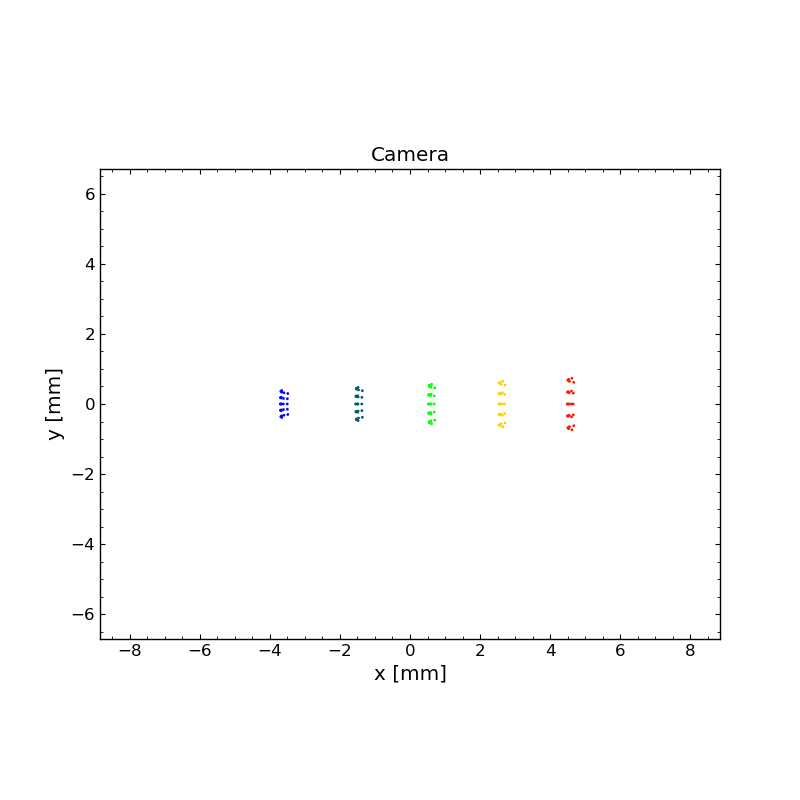

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
camera.plot(ax=ax)
#TODO: Fix camera hits positions